In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('Data/Miles_Traveled.csv')
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [4]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      588 non-null    datetime64[ns]
 1   y       588 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.3 KB


<AxesSubplot:xlabel='ds'>

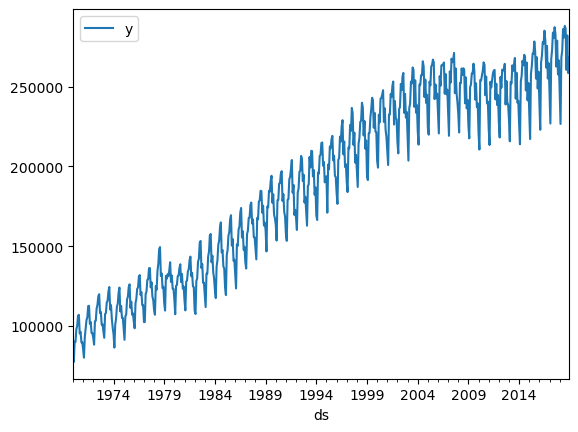

In [7]:
df.plot(x='ds', y='y')

In [8]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [9]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -3.77774
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2039.7    0.00759827       239.602           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2050.1    0.00119252       164.413        1.11       0.111      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2053.92   0.000671594       95.6316           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2056.22   0.000523979       101.898           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2058.12    0.00160357       344.359      0.5011           1      586   
    Iter      log prob        ||dx||      ||grad||       alpha  

/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [11]:

forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263266.614714,273807.405917,285434.380041,263189.376046,263317.092552,16449.946160,16449.946160,16449.946160,16449.946160,16449.946160,16449.946160,0.0,0.0,0.0,279716.560874
584,2018-09-01,263406.021221,256038.188379,267603.684901,263298.055279,263482.179626,-1668.037766,-1668.037766,-1668.037766,-1668.037766,-1668.037766,-1668.037766,0.0,0.0,0.0,261737.983455
585,2018-10-01,263540.930745,262985.049654,274524.852632,263383.868130,263643.649184,5308.621529,5308.621529,5308.621529,5308.621529,5308.621529,5308.621529,0.0,0.0,0.0,268849.552273
586,2018-11-01,263680.337252,249504.857741,261259.654251,263491.078619,263813.489972,-8206.222634,-8206.222634,-8206.222634,-8206.222634,-8206.222634,-8206.222634,0.0,0.0,0.0,255474.114618
587,2018-12-01,263815.246775,250999.884274,262505.530576,263584.758359,263996.640753,-6919.443306,-6919.443306,-6919.443306,-6919.443306,-6919.443306,-6919.443306,0.0,0.0,0.0,256895.803469


<AxesSubplot:xlabel='ds'>

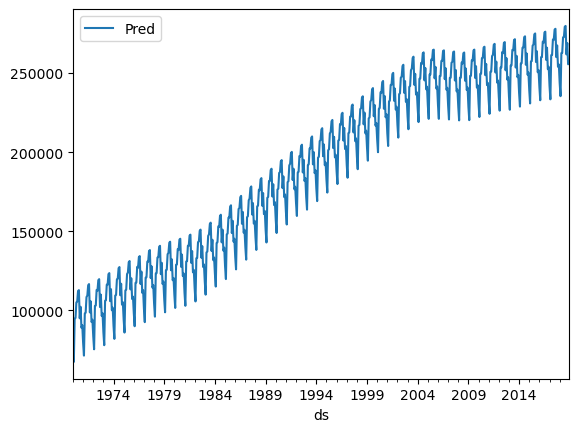

In [17]:
forecast.plot(x='ds', y='yhat', label='Pred', legend=True)

<AxesSubplot:xlabel='ds'>

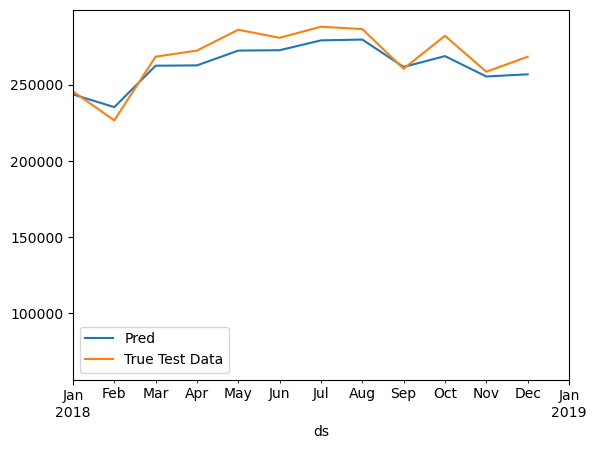

In [16]:
from datetime import date

ax = forecast.plot(x='ds', y='yhat', label='Pred', legend=True)
test.plot(x='ds', y='y', label='True Test Data', legend=True, ax=ax, xlim=(date(2018, 1, 1), date(2019, 1, 1)))

In [18]:
from statsmodels.tools.eval_measures import rmse

In [19]:
pred = forecast.iloc[-12:]['yhat']
pred

576    243723.347160
577    235350.930536
578    262551.903831
579    262751.395874
580    272473.090746
581    272724.130289
582    279181.210177
583    279716.560874
584    261737.983455
585    268849.552273
586    255474.114618
587    256895.803469
Name: yhat, dtype: float64

In [20]:
rmse(pred, test['y'])

8718.104284903175

In [21]:
test.mean()

/var/folders/k9/3kpzjsgj0j128198fg7_ypfm0000gn/T/ipykernel_16910/1706541227.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  test.mean()


y    268739.666667
dtype: float64

In [22]:
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [23]:
# initial
initial = 5 * 365
initial = str(initial) + ' days'
initial

'1825 days'

In [24]:
period = 5 * 365
period = str(period) + ' days'
period

'1825 days'

In [25]:
horizon = 365
horizon = str(horizon) + ' days'
horizon

'365 days'

In [26]:
df_cv = cross_validation(m, initial=initial, period=period, horizon=horizon)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -91.7849
Iteration  1. Log joint probability =    69.1211. Improved by 160.906.
Iteration  2. Log joint probability =    158.397. Improved by 89.2757.
Iteration  3. Log joint probability =    212.941. Improved by 54.5439.
Iteration  4. Log joint probability =    268.941. Improved by 56.0004.
Iteration  5. Log joint probability =    290.868. Improved by 21.9274.
Iteration  6. Log joint probability =    291.054. Improved by 0.185877.
Iteration  7. Log joint probability =    291.229. Improved by 0.174452.
Iteration  8. Log joint probability =     291.38. Improved by 0.151191.
Iteration  9. Log joint probability =    291.616. Improved by 0.23628.
Iteration 10. Log joint probability =    291.978. Improved by 0.361749.
Iteration 11. Log joint probability =    293.491. Improved by 1.51346.
Iteration 12. Log joint probability =    297.736. Improved by 4.2444.
Iteration 13. Log joint probability =    309.329. Improved by 11.5933.
Iteration 14. Log joint probabil

/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -2.81553
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       515.681    0.00101637       59.3529           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     198       518.901   0.000195407       66.0015    4.19e-07       0.001      313  LS failed, Hessian reset 
     199       518.912   0.000275524       89.2173          10           1      315   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     249       519.449   7.61469e-05       71.1323   1.039e-06       0.001      411  LS failed, Hessian reset 
     270       519.456   2.37732e-05       67.2894   3.217e-07       0.001      470  LS failed, Hessian reset 
     299       519.458    6.5037e-08       64.3837      0.5822      0.5822      509   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -2.67784
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       713.967    0.00345166       189.829      0.2408      0.2408      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       716.913   0.000127345       120.704   4.326e-07       0.001      257  LS failed, Hessian reset 
     199       717.138   0.000134088       72.8129       0.286      0.4158      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     261       718.135   0.000114381       145.453   1.071e-06       0.001      432  LS failed, Hessian reset 
     299       718.579   0.000372642       111.064           1           1      478   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     338       718.723   0.000156622       91.3491   3.216e-06       0.001      565  LS failed, Hessian rese

/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -2.6667
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       946.867    0.00621372       506.903           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     177       949.473   5.92134e-05       98.0606   3.693e-07       0.001      265  LS failed, Hessian reset 
     199       949.606   0.000730689       91.6386           1           1      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       951.028   3.34674e-05       63.2385      0.5654      0.5654      412   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     305       951.074   9.43473e-05       129.578   1.382e-06       0.001      453  LS failed, Hessian reset 
     391       951.593   0.000189457       218.566   2.421e-06       0.001      622  LS failed, Hessian reset

/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -2.58154
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1195.87     0.0210799         362.2           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122       1198.45    3.1615e-05       81.9267   2.301e-07       0.001      196  LS failed, Hessian reset 
     199        1201.2      0.001173       176.328           1           1      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1202.26    0.00265728       212.073           1           1      420   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1203.84    2.6255e-05       66.7138      0.5755      0.5755      537   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     465       1204.23   4.47237e-05    

/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -2.56085
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1439.1    0.00427882       554.101      0.7571      0.7571      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1441.54      0.001801       179.371           1           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     277       1443.43   4.39643e-05       77.0377   1.414e-07       0.001      393  LS failed, Hessian reset 
     291       1443.58   8.01492e-05       136.564   1.261e-06       0.001      451  LS failed, Hessian reset 
     299       1443.61   5.40406e-05       56.8214      0.6994      0.6994      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     320       1443.66   2.01797e-05       67.0564   1.656e-07       0.001      532  LS failed, Hessian rese

/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -2.66468
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1662.37    0.00156942       208.013           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1666.18     0.0011213        192.96           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1667.78    0.00111703       163.682           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     380       1668.58   9.05608e-05       157.079   6.495e-07       0.001      491  LS failed, Hessian reset 
     399       1668.75    0.00021245       62.2382      0.3334           1      512   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1669.08   0.000125425    

/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -3.75805
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          1814    0.00429274       1061.34      0.5261           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1831.52    0.00150612       277.025           1           1      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1836.86    0.00428395       404.117           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     375       1840.95    5.3012e-05       178.101   2.042e-07       0.001      480  LS failed, Hessian reset 
     399       1842.28   0.000118254       153.797      0.3923      0.3923      507   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     487       1842.86   3.73583e-05    

/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -3.66691
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2016.05    0.00227602       415.296           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2023.95   0.000824068       880.928      0.2428           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     237       2024.71   3.23406e-05       83.5797   1.527e-07       0.001      319  LS failed, Hessian reset 
     284       2025.56   0.000163697       170.181    1.64e-06       0.001      413  LS failed, Hessian reset 
     299       2025.85     0.0011718        163.01           1           1      430   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     347       2026.11    3.3606e-05       118.499   3.167e-07       0.001      534  LS failed, Hessian rese

In [27]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.087396,106995.698104,109912.667188,102445.0,1976-12-11
1,1977-02-01,102996.111534,101638.949299,104473.155533,102416.0,1976-12-11
2,1977-03-01,118973.318116,117485.598649,120350.469013,119960.0,1976-12-11
3,1977-04-01,120612.923706,119261.381488,122065.575982,121513.0,1976-12-11
4,1977-05-01,127883.031823,126405.633890,129238.039944,128884.0,1976-12-11


In [28]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,52 days,2.412378e+07,4911.596973,4520.456714,0.027725,0.023397,0.4
1,53 days,2.162637e+07,4650.415733,4255.219932,0.024980,0.023397,0.4
2,54 days,1.817308e+07,4262.989868,3734.518606,0.020111,0.022499,0.5
3,55 days,2.292103e+07,4787.591146,4241.991899,0.023085,0.023397,0.4
4,57 days,2.080469e+07,4561.216138,3983.401473,0.021394,0.022499,0.5
...,...,...,...,...,...,...,...
94,360 days,1.801720e+07,4244.666808,3731.471815,0.019454,0.019498,0.5
95,361 days,1.714829e+07,4141.048892,3456.281360,0.018081,0.018955,0.5
96,362 days,3.135487e+07,5599.542213,4376.633857,0.021857,0.024451,0.4
97,364 days,2.972203e+07,5451.791251,4224.751699,0.021295,0.021868,0.5


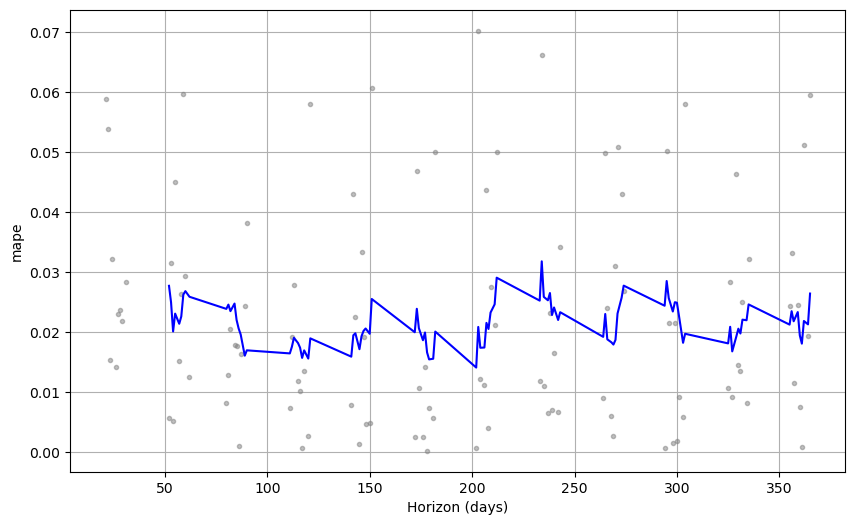

In [31]:
plot_cross_validation_metric(df_cv, metric='mape');